In [1]:
#Module 2
#Data Analysis and Visualisation
#Import the pandas library and load the titanic_data_set.csv into a dataframe named df

import pandas as pd

In [2]:
df = pd.read_csv("titanic_data_set.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#Derive relationships between features and survival for Pclass and Sex.
survived = df[df['Survived'] == 1]
print("Survied =",len(survived))
dead = df[df['Survived'] == 0]
print("Dead =", len(dead))
print("Total Casualities =",len(df))

Survied = 342
Dead = 549
Total Casualities = 891


In [11]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [16]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [21]:
#Import the matplotlib and seaborn library and set them for working in ipython notebook
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

In [24]:
import seaborn as sns
sns.set()

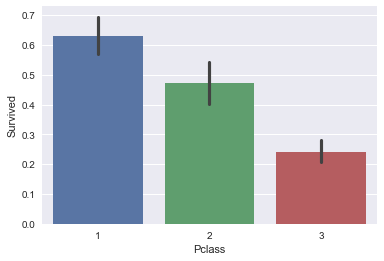

In [28]:
#Plot bar graphs between features and survival for Pclass and Sex
sns.barplot(x='Pclass', y='Survived', data=df)

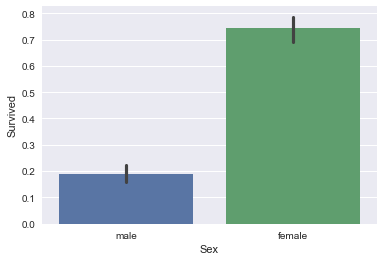

In [29]:
sns.barplot(x='Sex', y='Survived', data=df)

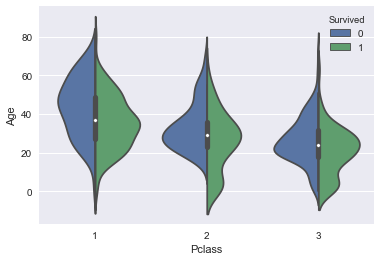

In [33]:
#Plot violin plots between different sets of features and survival for Pclass & Age and Sex & Age.

#Violinplot for Pclass & Age
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)

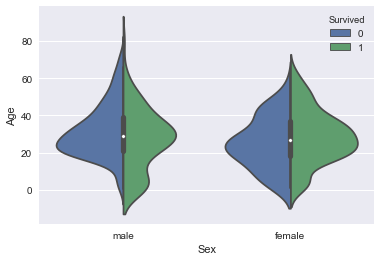

In [31]:
#Violinplot for Age & Sex
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)

In [34]:
#Analyse the data set for missing values by printing the attributes and number of occurances with null counts
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
#Using imputer replace the missing values with the mean of the feature for Age
from sklearn.preprocessing import Imputer

In [36]:
age_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [37]:
age_imputer = age_imputer.fit(df.iloc[:,[5]])

In [39]:
df.iloc[:,[5]] = age_imputer.transform(df.iloc[:,[5]])

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
#Mean of feature, Age : Done
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
#Replace the missing values with class with maximum frequency for Embarked
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [45]:
df['Embarked'] = df['Embarked'].fillna('S')

In [46]:
#Replace of the missing values with max freq : Done
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [48]:
#Using LabelEncoder label encode the data for categorical features v.i.z. Sex and Embarked
from sklearn.preprocessing import LabelEncoder

In [49]:
#Label Encode the data : Sex
labelencoder_sex = LabelEncoder()

In [50]:
df.iloc[:,[4]] = labelencoder_sex.fit_transform(df.iloc[:,[4]])

/home/jerry/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [52]:
#Label Encode the data : Embarked
labelencoder_embarked = LabelEncoder()

In [53]:
df.iloc[:,[11]] = labelencoder_embarked.fit_transform(df.iloc[:,[11]])

/home/jerry/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [55]:
#Using dummies, one hot encode the multiclass features v.i.z. Embarked
from sklearn.preprocessing import OneHotEncoder

In [56]:
df = pd.get_dummies(df, columns=['Pclass', 'Embarked'])

In [57]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1


In [58]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [59]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,2
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1,2
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,1


In [65]:
#New Feature : FamilySize
df.iloc[:,[16]]

,FamilySize
0,2
1,2
2,1
3,2
4,1
5,1
6,1
7,5
8,3
9,2


In [66]:
#Drop the irrelevant features v.i.z. PassengerId, Name, SibSp, Parch, Ticket and Cabin from the dataframe.
irrelevant_features = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']

(891, 11)

In [67]:
df = df.drop(irrelevant_features, axis=1)

In [68]:
df.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,1,22.0,7.2500,0,0,1,0,0,1,2
1,1,0,38.0,71.2833,1,0,0,1,0,0,2
2,1,0,26.0,7.9250,0,0,1,0,0,1,1
3,1,0,35.0,53.1000,1,0,0,0,0,1,2
4,0,1,35.0,8.0500,0,0,1,0,0,1,1


In [71]:
pd

(891, 11)